Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3634/3634 ━━━━━━━━━━━━━━━━━━━━ 47s 12ms/step - loss: 0.0050 - mean_absolute_error: 0.0421 - val_loss: 5.5390e-04 - val_mean_absolute_error: 0.0168
Epoch 2/30
3634/3634 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - loss: 4.4795e-04 - mean_absolute_error: 0.0153 - val_loss: 3.8651e-04 - val_mean_absolute_error: 0.0133
Epoch 3/30
3634/3634 ━━━━━━━━━━━━━━━━━━━━ 84s 13ms/step - loss: 3.7455e-04 - mean_absolute_error: 0.0136 - val_loss: 3.5730e-04 - val_mean_absolute_error: 0.0126
Epoch 4/30
3634/3634 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - loss: 3.1325e-04 - mean_absolute_error: 0.0121 - val_loss: 3.3399e-04 - val_mean_absolute_error: 0.0123
Epoch 5/30
3634/3634 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - loss: 2.6951e-04 - mean_absolute_error: 0.0109 - val_loss: 2.6254e-04 - val_mean_absolute_error: 0.0097
Epoch 6/30
3634/3634 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - loss: 2.5101e-04 - mean_absolute_error: 0.0103 - val_loss: 2.5449e-04 - val_mean_absolute_error: 0.0099
Epoch 7/30
3634/3634 ━━━━━━━━━━━

909/909 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


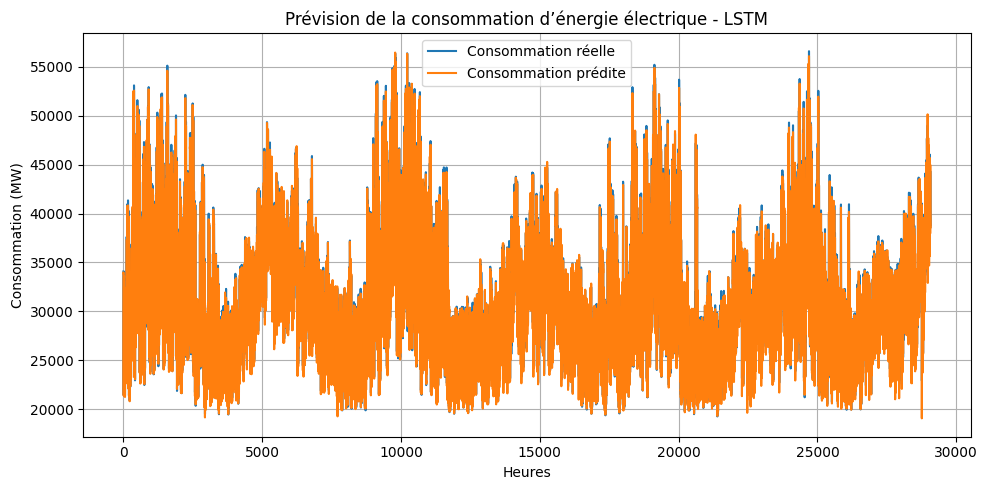

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prévision pour nouvelles données :
[[45293.39 ]
 [44139.58 ]
 [41631.402]
 [39836.47 ]
 [35797.39 ]
 [36322.695]
 [36824.332]
 [37511.645]
 [38549.203]
 [40712.734]
 [44302.188]
 [46994.55 ]
 [45932.605]
 [44315.88 ]
 [41576.984]
 [40608.555]
 [40022.785]
 [38904.785]
 [37882.043]
 [37915.023]
 [40918.086]
 [43992.49 ]
 [44325.973]
 [43549.46 ]
 [42769.348]
 [40861.773]
 [38220.78 ]
 [36190.13 ]
 [34686.074]
 [37398.46 ]
 [36603.574]
 [37438.75 ]
 [38729.6  ]
 [40217.   ]
 [42343.875]
 [43842.777]
 [44632.848]
 [43457.383]
 [42519.137]
 [41488.09 ]
 [40670.89 ]
 [40150.94 ]
 [39452.375]
 [39967.62 ]
 [42317.145]
 [44854.426]
 [45714.29 ]
 [45697.26 ]
 [45070.957]
 [43415.984]
 [41223.863]
 [38732.71 ]
 [35642.977]
 [38527.93 ]
 [37567.29 ]
 [37583.98 ]
 [38218.17 ]
 [39268.87 ]
 [40621.28 ]
 [40859.504]
 [40417.26 ]
 [39960.54 ]
 [38874.277]
 [38603.766]
 [38832.92 ]
 [38897.98 ]
 [38511.11 ]
 [39106.555]
 [41209.91 ]
 [43898.312]
 [44987.53 ]
 [43

In [ ]:
# TP4 - Prévision de la consommation d'énergie électrique avec LSTM

# Partie 1 : Chargement et préparation des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras import Input
from tensorflow.keras.models import load_model

# Charger le dataset PJME_hourly
data = pd.read_csv('PJME_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')
consumption = data['PJME_MW'].values.reshape(-1, 1)

# Partie 2 : Normalisation

scaler = MinMaxScaler()
scaled = scaler.fit_transform(consumption)

# Partie 3 : Création des séquences temporelles
def create_sequences(data, seq_len=24):  # 24 heures pour capturer les motifs quotidiens
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_length = 24  # Utiliser 24 heures comme fenêtre temporelle
X, y = create_sequences(scaled, seq_length)

# Partie 4 : Séparation en ensembles d’entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Partie 5 : Définition du modèle LSTM


model = Sequential([
    Input(shape=(seq_length, 1)),
    LSTM(50, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
model.summary()

# Partie 6 : Entraînement du modèle
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Partie 7 : Prédiction et dénormalisation
pred = model.predict(X_test)
pred_consumption = scaler.inverse_transform(pred)
true_consumption = scaler.inverse_transform(y_test)

# Partie 8 : Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.plot(true_consumption, label='Consommation réelle')
plt.plot(pred_consumption, label='Consommation prédite')
plt.title('Prévision de la consommation d’énergie électrique - LSTM')
plt.xlabel('Heures')
plt.ylabel('Consommation (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Partie 9 : Sauvegarde et réutilisation du modèle
model.save('lstm_energy_model.keras')

# Partie 10 : Chargement et prédiction sur nouvelles données

loaded_model = load_model('lstm_energy_model.keras')

# Utiliser une partie des données existantes comme "nouvelles données" (par exemple, les 100 dernières heures)
new_data = data.tail(100)  # Prendre les 100 dernières heures
new_consumption = new_data['PJME_MW'].values.reshape(-1, 1)
new_scaled = scaler.transform(new_consumption)

# Vérifier qu'il y a assez de points pour une prédiction
if len(new_scaled) > seq_length:
    X_new, _ = create_sequences(new_scaled, seq_length)
    pred_new = loaded_model.predict(X_new)
    pred_new_consumption = scaler.inverse_transform(pred_new)
    print("Prévision pour nouvelles données :")
    print(pred_new_consumption)
else:
    print(f"⚠ Pas assez de données pour faire une prédiction (besoin d’au moins {seq_length+1} points, seulement {len(new_scaled)} fournis).")